### Regularized Logistic Regression

In [611]:
# import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [612]:
data = pd.read_csv('ex2data2.txt',header = None)
data.head()

,0,1,2
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


In [613]:
#describe data
data.describe()

,0,1,2
count,118.000000,118.000000,118.000000
mean,0.054779,0.183102,0.491525
std,0.496654,0.519743,0.502060
min,-0.830070,-0.769740,0.000000
25%,-0.372120,-0.254385,0.000000
50%,-0.006336,0.213455,0.000000
75%,0.478970,0.646562,1.000000
max,1.070900,1.108900,1.000000


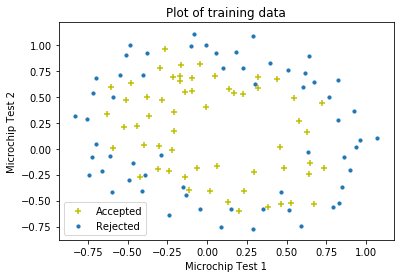

In [614]:
# data visualization

X=data.iloc[:,:-1].values
y=data.iloc[:,-1].values

pos , neg = (y==1).reshape(118,1) , (y==0).reshape(118,1)
plt.scatter(X[pos[:,0],0],X[pos[:,0],1],c="y",marker="+")
plt.scatter(X[neg[:,0],0],X[neg[:,0],1],marker="o",s=10)

plt.xlabel("Microchip Test 1")
plt.ylabel("Microchip Test 2")
plt.title('Plot of training data')
plt.legend(["Accepted","Rejected"],loc=0)

plt.show()

#### Feature mapping

One way to fit the data better is to create more features from each data point.we will map the features into
all polynomial terms of x1 and x2 up to the sixth power.As a result of this mapping, our vector of two features (the scores on
two QA tests) has been transformed into a 28-dimensional vector.

In [615]:
def Featuremapping(x1,x2,degree):

    out = np.ones(len(x1)).reshape(len(x1),1)
    for i in range(1,degree+1):
        for j in range(i+1):
            out = np.hstack((out, np.multiply(np.power(x1, i-j),np.power(x2, j))[:,np.newaxis]))

    return out


In [616]:
X = Featuremapping(X[:,0], X[:,1],6)

print(X)
# X.shape = 118,28

[[ 1.00000000e+00  5.12670000e-02  6.99560000e-01 ...  6.29470940e-04
   8.58939846e-03  1.17205992e-01]
 [ 1.00000000e+00 -9.27420000e-02  6.84940000e-01 ...  1.89305413e-03
  -1.39810280e-02  1.03255971e-01]
 [ 1.00000000e+00 -2.13710000e-01  6.92250000e-01 ...  1.04882142e-02
  -3.39734512e-02  1.10046893e-01]
 ...
 [ 1.00000000e+00 -4.84450000e-01  9.99270000e-01 ...  2.34007252e-01
  -4.82684337e-01  9.95627986e-01]
 [ 1.00000000e+00 -6.33640000e-03  9.99270000e-01 ...  4.00328554e-05
  -6.31330588e-03  9.95627986e-01]
 [ 1.00000000e+00  6.32650000e-01 -3.06120000e-02 ...  3.51474517e-07
  -1.70067777e-08  8.22905998e-10]]


### Computing Regularize Cost Function and Gradient

$J(\Theta) = \frac{1}{m} \sum_{i=1}^{m} [ -y^{(i)}log(h_{\Theta}(x^{(i)})) - (1 - y^{(i)})log(1 - (h_{\Theta}(x^{(i)}))] + \frac{\lambda}{2m} \sum_{j=1}^n \Theta_j^2$

$ \frac{\partial J(\Theta)}{\partial \Theta_j} = \frac{1}{m} \sum_{i=1}^{m} (h_{\Theta}(x^{(i)}) - y^{(i)})x_j^{(i)}$ for $j=0$

$ \frac{\partial J(\Theta)}{\partial \Theta_j} = \frac{1}{m} \sum_{i=1}^{m} (h_{\Theta}(x^{(i)}) - y^{(i)})x_j^{(i)} + \frac{\lambda}{m}\Theta_j$ for $j\geq 1$


In [617]:
def sigmoid(z):
    
    return 1/(1+np.exp(-z))

In [618]:
def Costfunction(X,y,theta,Lambda):
    
    m = len(y)
    
    y = y[:,np.newaxis]
    
    prediction = sigmoid(X @ theta)
    
    error = (-y * np.log(prediction)) - ((1-y)*np.log(1-prediction))
    
    cost = 1/m * sum(error)
    
    reg_cost = cost + Lambda/(2*m) * sum(np.power(theta,2))
    
    j_0 = 1/m * (X.T @ (prediction - y))[0]
    
    j_1 = 1/m * (X.T @ (prediction - y))[1:] + (Lambda/m)*theta[1:]
    
    grad= np.vstack((j_0[:,np.newaxis],j_1))
    
#     print(cost.shape)
    
    return cost[0],grad
    

In [619]:
# Initialize fitting parameters
initial_theta = np.zeros((X.shape[1], 1))

# Set regularization parameter lambda to 1
Lambda = 1

#Compute and display initial cost and gradient for regularized logistic regression
cost, grad=Costfunction( X, y,initial_theta, Lambda)

In [620]:
print("Cost at initial theta :",cost)
print(grad.shape)

Cost at initial theta : 0.6931471805599461
(28, 1)


#### Gradient Descent

In [621]:
def compute_gradient(X, y, theta,alpha,iterations,Lambda):
    
    m=len(y)
    J_history =[]
    
    for i in range(iterations):
        cost, grad = Costfunction(X,y,theta,Lambda)
        theta = theta - (alpha * grad)
        J_history.append(cost)
    
    return theta , J_history

In [622]:
theta , J_history = compute_gradient(X,y,initial_theta,Lambda,800,0.2)

In [623]:
print("The regularized theta regression:\n",theta)

The regularized theta regression:
 [[ 2.25319932]
 [ 1.44552306]
 [ 2.33283911]
 [-3.57008233]
 [-2.35002884]
 [-3.07090829]
 [ 0.50119267]
 [-0.88407626]
 [-0.69606495]
 [-0.22204243]
 [-2.69560917]
 [ 0.04161168]
 [-1.31573798]
 [-0.80286232]
 [-2.23101395]
 [-0.39638083]
 [-0.43758167]
 [ 0.09476652]
 [-0.69300577]
 [-0.78996079]
 [-0.45416815]
 [-2.01051679]
 [ 0.16446857]
 [-0.59855483]
 [ 0.11471778]
 [-0.73960173]
 [-0.52044034]
 [-1.38532427]]


#### Plot CostFunction

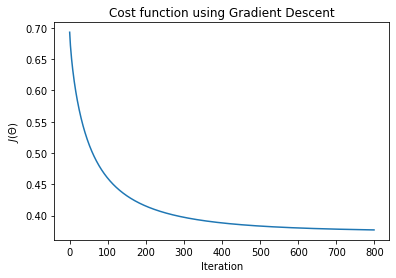

In [624]:
plt.plot(J_history)
plt.xlabel("Iteration")
plt.ylabel("$J(\Theta)$")
plt.title("Cost function using Gradient Descent")
plt.show()

In [625]:
def mapFeaturePlot(x1,x2,degree):

    out = np.ones(1)
    for i in range(1,degree+1):
        for j in range(i+1):
            out = np.hstack((out, np.multiply(np.power(x1, i-j),np.power(x2, j))))
    return out

#### Plot Decision Boundary

Contour plot reference \
https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.contour.html

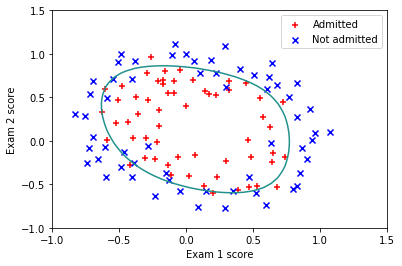

In [626]:
plt.scatter(X[pos[:,0],1],X[pos[:,0],2],c="r",marker="+",label="Admitted")
plt.scatter(X[neg[:,0],1],X[neg[:,0],2],c="b",marker="x",label="Not admitted")

# numpy.linspace(start, stop, num = 50, endpoint = True, retstep = False, dtype = None)
a = np.linspace(-1,1.5,50)
b = np.linspace(-1,1.5,50)

c = np.zeros((len(a),len(b)))

for i in range(len(a)):
    for j in range(len(b)):
        c[i,j] =mapFeaturePlot(a[i],b[j],6) @ theta 

plt.contour(a,b,c.T,0)
plt.xlabel("Exam 1 score")
plt.ylabel("Exam 2 score")
plt.legend(loc=0)


#### Find Accuracy of classifier

To find Accuracy, Compute the % of correct classification on our training set.

In [627]:
def classifier_accuracy(X, theta):
    
    prediction = X @ theta
    
    return (prediction > 0)

Accuracy = classifier_accuracy(X,theta)
print('Training Accuracy of our classifier: %0.2f'%(sum(Accuracy==y[:,np.newaxis])/len(y) *100)[0],"%")

Training Accuracy of our classifier: 83.05 %
